<a href="https://colab.research.google.com/github/Kenjiro1/Formacao_IA/blob/main/Projetos_Deep_Learning/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

In [2]:
dataset_train = pd.read_csv('https://raw.githubusercontent.com/Kenjiro1/Formacao_IA/refs/heads/main/dados/Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
dataset_train.shape

(1258, 6)

In [4]:
training_set = dataset_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
training_set_scaled = scaler.fit_transform(training_set)

training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [6]:
X_train = []
Y_train = []

for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  Y_train.append(training_set_scaled[i,0])


X_train, Y_train = np.array(X_train), np.array(Y_train)



In [7]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [8]:
#Ajuste dos dados para LSTM
#np.reshape(dados, batch_size, time_steps, n_indicadores)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_train.shape # 3 dimensoes

(1198, 60, 1)

In [12]:
modelo_LSTM = Sequential()
modelo_LSTM.add(LSTM(units=50, return_sequences = True, input_shape = (X_train.shape[1],1)))
modelo_LSTM.add(Dropout(0.2))
modelo_LSTM.add(LSTM(units=50, return_sequences=True)) #units = numero de neuronios
modelo_LSTM.add(Dropout(0.2))
modelo_LSTM.add(LSTM(units=50, return_sequences=True))
modelo_LSTM.add(Dropout(0.2))
modelo_LSTM.add(LSTM(units=50))
modelo_LSTM.add(Dropout(0.2))
modelo_LSTM.add(Dense(units=1)) # Por ser um problema de regressão


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
modelo_LSTM.compile(optimizer='adam', loss='mean_squared_error')
es_func_a_cada_epoch = EarlyStopping(monitor = 'loss', mode='min', verbose =1, patience=30) #verbose é o numero de saidas, patience= numero de epochs que ele vai esperar mesmo com a validação ja feita
modelo_LSTM.fit(X_train,Y_train, epochs=500, batch_size=32, callbacks=[es_func_a_cada_epoch]) #Esse parametro callbacks é chamar uma função que será chamada a cada fim de epoch

Epoch 1/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - loss: 0.0986
Epoch 2/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0069
Epoch 3/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0051
Epoch 4/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - loss: 0.0049
Epoch 5/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0055
Epoch 6/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0044
Epoch 7/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.0049
Epoch 8/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0047
Epoch 9/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0051
Epoch 10/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0041
Epoch 11/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0042
Epoch 12/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.0043
Epoch 13/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - loss: 0.0036
Epoch 14/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0046
Epoch 15/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/st

In [36]:
dataset_test = pd.read_csv('https://raw.githubusercontent.com/Kenjiro1/Formacao_IA/refs/heads/main/dados/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [37]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),axis=0)

In [38]:
inputs= dataset_total[len(dataset_total)- len(dataset_test)-60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [39]:
inputs = inputs.reshape(-1,1)
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [48]:
from re import X
inputs = scaler.fit_transform(inputs) #MinMax Scalr
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test , (X_test.shape[0],X_test.shape[1],-1))
predicted_stock_price = modelo_LSTM.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


In [50]:
predicted_stock_price

array([[782.9467 ],
       [779.5099 ],
       [785.05164],
       [785.7119 ],
       [792.66516],
       [803.4645 ],
       [806.3333 ],
       [804.19   ],
       [805.37494],
       [806.07935],
       [806.0705 ],
       [805.15314],
       [804.4953 ],
       [805.8192 ],
       [806.5084 ],
       [818.24286],
       [825.60974],
       [832.27985],
       [830.17487],
       [816.49475]], dtype=float32)

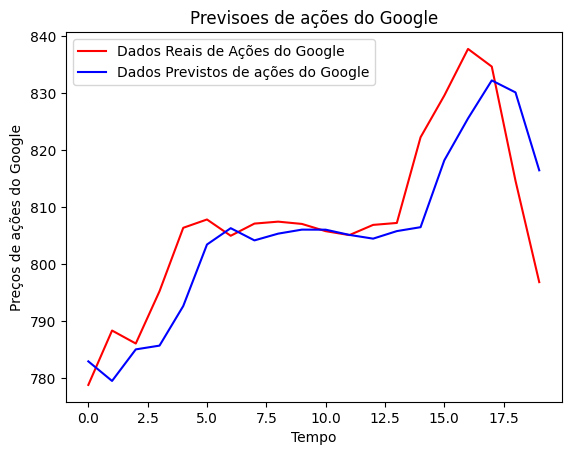

In [51]:
plt.plot(real_stock_price, color = 'red',label='Dados Reais de Ações do Google')
plt.plot(predicted_stock_price, color ='blue', label='Dados Previstos de ações do Google')
plt.title('Previsoes de ações do Google')
plt.xlabel('Tempo')
plt.ylabel('Preços de ações do Google')
plt.legend()
plt.show()